In [172]:
# evaluate the deep model on the test dataset
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# load model
	model = load_model('final_model.keras')
	# evaluate model on test dataset
	z, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0),z,acc,sep='\n')
    # print()
    # model.evaluate(testX,testY,verbose=0)
    
# entry point, run the test harness

In [86]:
run_test_harness()

> 91.140
0.28309619426727295
0.9114000201225281


In [234]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('1163.jpg')   
image=image[:, ::-1]
# BGR -> RGB  
#type(image.shape)
# img2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   
small_img=cv2.resize(image, (28,28))
img=cv2.cvtColor(small_img, cv2.COLOR_BGR2GRAY,)
img=np.abs(256-img)

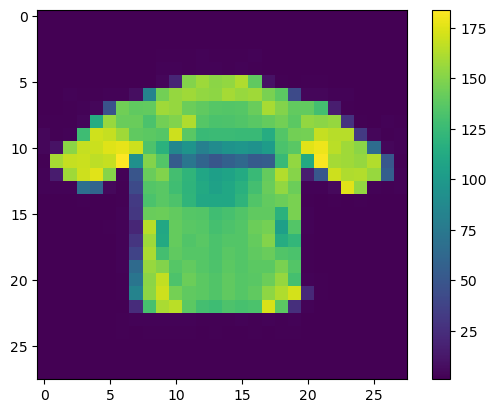

In [236]:
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

In [238]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [240]:
from keras.models import load_model
model = load_model('final_model.keras')
tf_img=tf.convert_to_tensor(img)
result = model.predict(tf_img)

result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


array([[2.7683234e-07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 9.9999976e-01, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

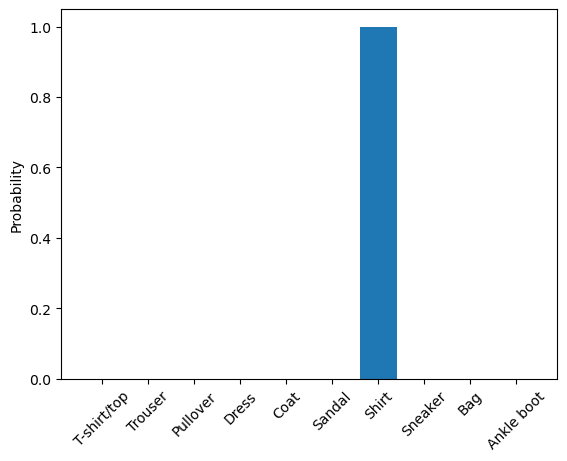

In [242]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
probabilities = result[0]

plt.bar(class_names, probabilities)
plt.xticks(range(10), class_names, rotation=45)
plt.ylabel('Probability')

plt.show()